## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].count()
print("Count of mice with duplicates : ",(mouse_count))

mouse_count_dup = combined_df["Mouse ID"].nunique()
print("Count of mice without duplicates : ",(mouse_count_dup))

Count of mice with duplicates :  1893
Count of mice without duplicates :  249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = combined_df[combined_df.duplicated(["Mouse ID","Timepoint"])]
dup_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
a = combined_df[["Mouse ID","Timepoint"]].value_counts()

a_mouse_id = combined_df.loc[combined_df["Mouse ID"] == "g989",:]
a_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates(subset=["Mouse ID"],keep = "last")

In [6]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [205]:
# Checking the number of mice in the clean DataFrame.
mouse_count = cleaned_df["Mouse ID"].count()
mouse_count

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 
    
summary_df = cleaned_df.groupby("Drug Regimen")
tumor_vol_mean = summary_df["Tumor Volume (mm3)"].mean()
tumor_vol_med = summary_df["Tumor Volume (mm3)"].median()
tumor_vol_var = summary_df["Tumor Volume (mm3)"].var()
tumor_vol_stdev = summary_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = summary_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stat_df = pd.DataFrame({
                                "Mean" : tumor_vol_mean,
                                "Median": tumor_vol_med,
                                "Variance" : tumor_vol_var,
                                "Standard_Deviation" : tumor_vol_stdev,
                                "SEM" : tumor_vol_sem 
                               })
summary_stat_df

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

#summary_df = cleaned_df.groupby("Drug Regimen")
count_tumor_vol = summary_df["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
count_tumor_vol


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_reg_df = pd.DataFrame(combined_df["Drug Regimen"].value_counts())
drug_reg_df

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,161


In [29]:
%matplotlib notebook

<IPython.core.display.Javascript object>


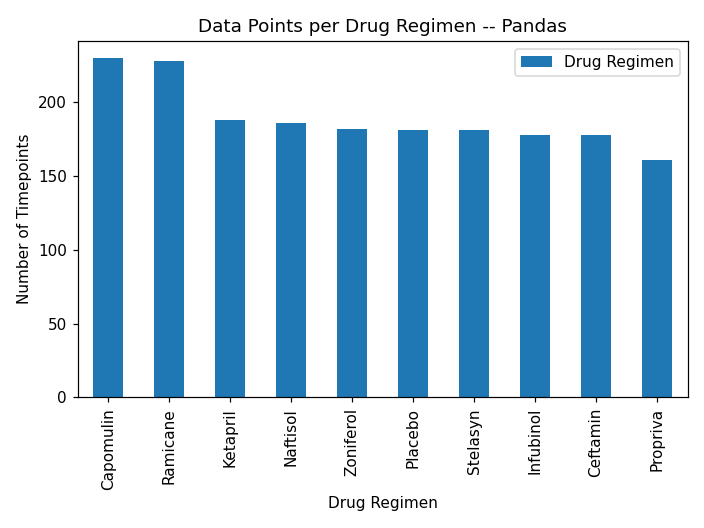

In [30]:
drug_reg_bar = drug_reg_df.plot(kind = "bar")
plt.title("Data Points per Drug Regimen -- Pandas")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.tight_layout()

In [31]:
%matplotlib notebook

<IPython.core.display.Javascript object>


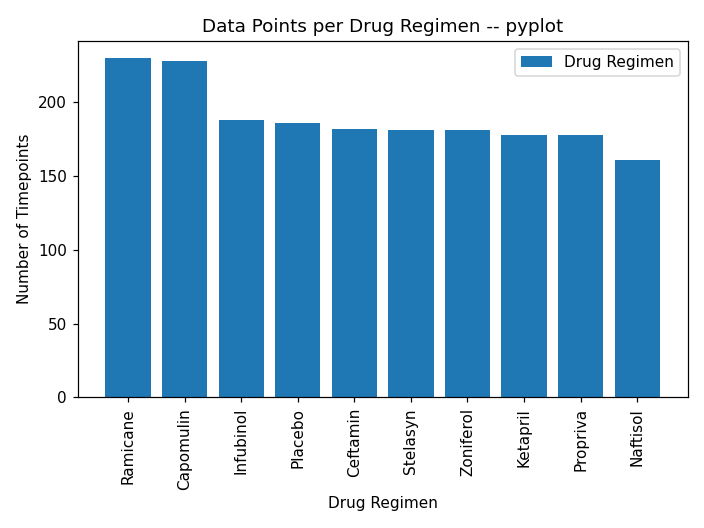

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
combined_df
x_axis = combined_df["Drug Regimen"].unique()
y_axis = drug_reg_df["Drug Regimen"]
#plt.figure(figsize=(6.4, 4.8))

plt.bar(x_axis,y_axis,align="center")
plt.xticks(rotation=90)
plt.title("Data Points per Drug Regimen -- pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.legend(["Drug Regimen"],loc="upper right")
plt.tight_layout()


In [87]:
%matplotlib notebook

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
combined_df
mouse_gender_df = pd.DataFrame(cleaned_df["Sex"].value_counts())
mouse_gender_df

,Sex
Male,125
Female,124


<IPython.core.display.Javascript object>


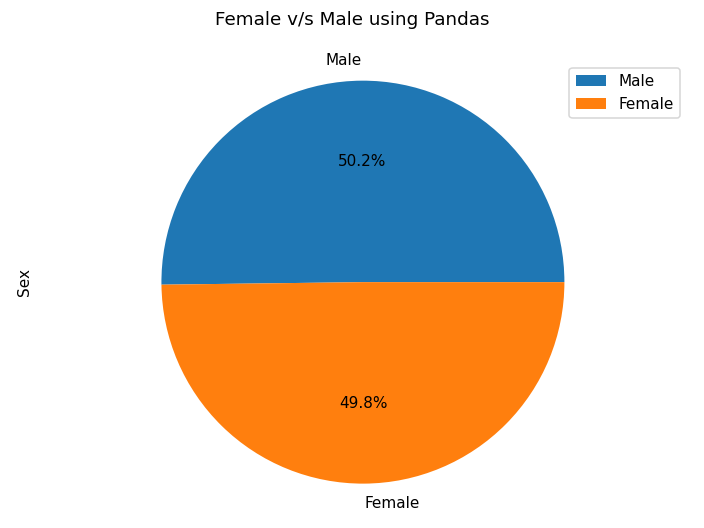

In [89]:
mouse_gender_pie = mouse_gender_df.plot(kind="pie", subplots=True, title=("Female v/s Male using Pandas"),autopct='%1.1f%%')
#plt.show()
plt.axis("equal")
plt.tight_layout()

In [95]:
%matplotlib notebook

<IPython.core.display.Javascript object>


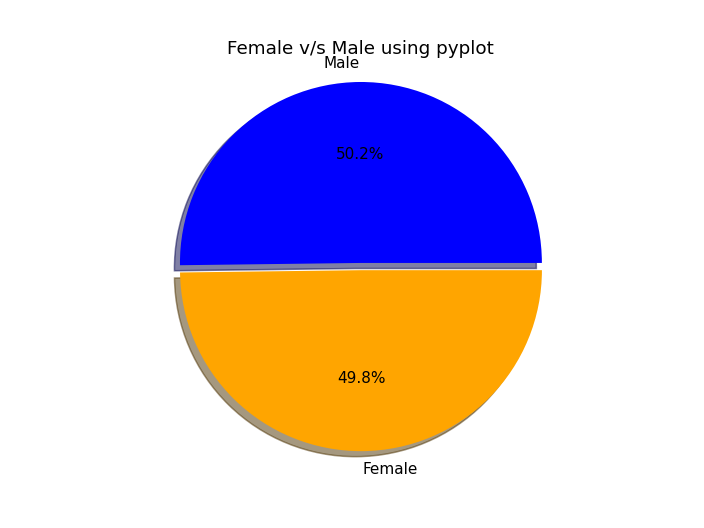

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_val_df = cleaned_df.loc[cleaned_df["Sex"] == "Male",:]
female_val_df = cleaned_df.loc[cleaned_df["Sex"] == "Female",:]

sizes = [len(male_val_df),len(female_val_df)]
labels = ["Male","Female"]
explode = (0.04,0)
colors = ["blue", "orange"]


plt.title("Female v/s Male using pyplot")
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=0)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [167]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_ori_df = combined_df.copy()

df = combined_df.groupby(["Drug Regimen","Mouse ID"]).max()["Timepoint"]
drug_grp_df = df.to_frame()
drug_grp_df.head(50)
#mouse_ori_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
time_max_df = pd.merge(mouse_ori_df,drug_grp_df,on = ("Drug Regimen","Mouse ID",'Timepoint'), how = "inner")

drug_grp_1 = time_max_df.loc[time_max_df["Drug Regimen"] == "Capomulin",:]
drug_grp_2 = time_max_df.loc[time_max_df["Drug Regimen"] == "Ramicane",:]
drug_grp_3 = time_max_df.loc[time_max_df["Drug Regimen"] == "Infubinol",:]
drug_grp_4 = time_max_df.loc[time_max_df["Drug Regimen"] == "Ceftamin",:]
drug_grp_1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3
12,y793,Capomulin,Male,17,17,45,31.896238,2
13,r554,Capomulin,Female,8,17,45,32.377357,3
14,m957,Capomulin,Female,3,19,45,33.329098,1
16,t565,Capomulin,Female,20,17,45,34.455298,0
20,i738,Capomulin,Female,23,20,45,37.311846,2


In [135]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capo_x_axis = drug_grp_1["Tumor Volume (mm3)"]
rami_x_axis = drug_grp_2["Tumor Volume (mm3)"]
infu_x_axis = drug_grp_3["Tumor Volume (mm3)"]
ceft_x_axis = drug_grp_4["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#-------------CAPOMINE Calculations--------------
quartiles_capo = capo_x_axis.quantile([.25,.5,.75])
lowerq_capo = quartiles_capo[0.25]
upperq_capo = quartiles_capo[0.75]
iqr_capo = upperq_capo-lowerq_capo
lower_bound_capo = lowerq_capo - (1.5*iqr_capo)
upper_bound_capo = upperq_capo + (1.5*iqr_capo)
print("Drug: Capomulin")
print(quartiles_capo)
print(f"The lower quartile of temperatures is: {lowerq_capo}")
print(f"The upper quartile of temperatures is: {upperq_capo}")
print(f"The interquartile range of temperatures is: {iqr_capo}")
print(f"Values below {lower_bound_capo} could be outliers.")
print(f"Values above {upper_bound_capo} could be outliers.")
print("-"*65)

#-------------Ramicane Calculations--------------
quartiles_rami = rami_x_axis.quantile([.25,.5,.75])
lowerq_rami = quartiles_rami[0.25]
upperq_rami = quartiles_rami[0.75]
iqr_rami = upperq_rami-lowerq_rami
lower_bound_rami = lowerq_rami - (1.5*iqr_rami)
upper_bound_rami = upperq_rami + (1.5*iqr_rami)
print("Drug: Ramicane")
print(quartiles_rami)
print(f"The lower quartile of temperatures is: {lowerq_rami}")
print(f"The upper quartile of temperatures is: {upperq_rami}")
print(f"The interquartile range of temperatures is: {iqr_rami}")
print(f"Values below {lower_bound_rami} could be outliers.")
print(f"Values above {upper_bound_rami} could be outliers.")
print("-"*65)

#-------------Infubinol Calculations--------------
quartiles_infu = infu_x_axis.quantile([.25,.5,.75])
lowerq_infu = quartiles_infu[0.25]
upperq_infu = quartiles_infu[0.75]
iqr_infu = upperq_infu-lowerq_infu
lower_bound_infu = lowerq_infu - (1.5*iqr_infu)
upper_bound_infu = upperq_infu + (1.5*iqr_infu)
print("Drug: Infubinol")
print(quartiles_infu)
print(f"The lower quartile of temperatures is: {lowerq_infu}")
print(f"The upper quartile of temperatures is: {upperq_infu}")
print(f"The interquartile range of temperatures is: {iqr_infu}")
print(f"Values below {lower_bound_infu} could be outliers.")
print(f"Values above {upper_bound_infu} could be outliers.")
print("-"*65)


#-------------Ceftamin Calculations--------------
quartiles_ceft = ceft_x_axis.quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft
lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)
print("Drug: Ceftamin")
print(quartiles_ceft)
print(f"The lower quartile of temperatures is: {lowerq_ceft}")
print(f"The upper quartile of temperatures is: {upperq_ceft}")
print(f"The interquartile range of temperatures is: {iqr_ceft}")
print(f"Values below {lower_bound_ceft} could be outliers.")
print(f"Values above {upper_bound_ceft} could be outliers.")
print("-"*65)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Drug: Capomulin
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------------------------------------
Drug: Ramicane
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------------------------------------------------
Drug: Infubinol
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
The lower quartile o

In [172]:
%matplotlib notebook

<IPython.core.display.Javascript object>


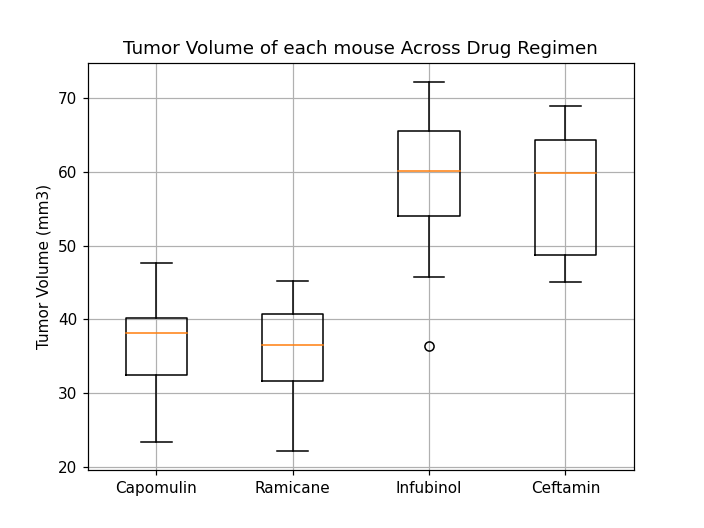

In [173]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()

ax1.boxplot([capo_x_axis,rami_x_axis,infu_x_axis,ceft_x_axis])

ax1.set_title("Tumor Volume of each mouse Across Drug Regimen")
ax1.set_xticklabels(drug_regimen)
ax1.set_ylabel("Tumor Volume (mm3)")

plt.grid()
plt.show()

## Line and Scatter Plots

In [182]:
%matplotlib notebook


<IPython.core.display.Javascript object>


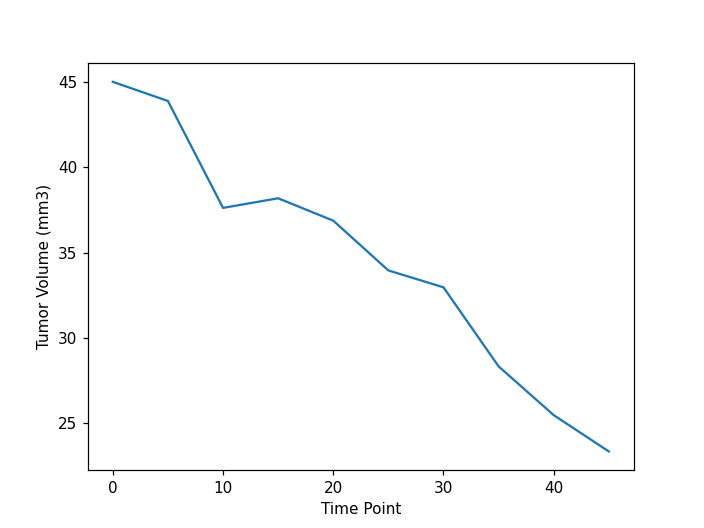

In [183]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_values = combined_df.loc[combined_df["Mouse ID"] == "s185","Timepoint"]
y_values = combined_df.loc[combined_df["Mouse ID"] == "s185","Tumor Volume (mm3)"]

plt.plot(x_values,y_values)
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [226]:
%matplotlib notebook


<IPython.core.display.Javascript object>


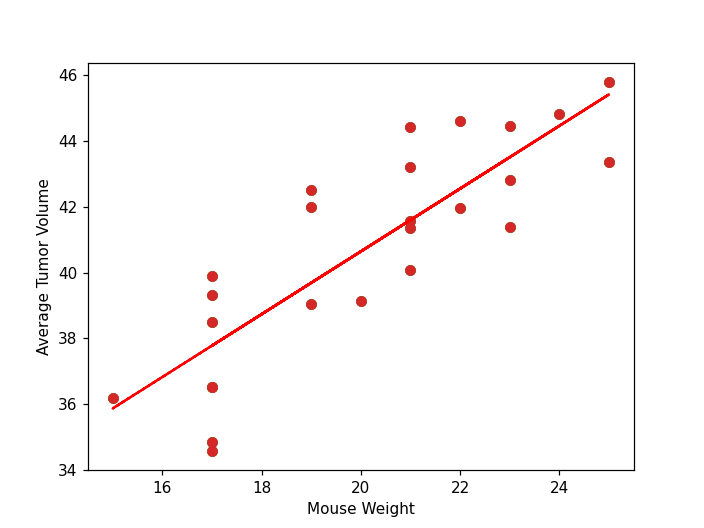

In [227]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

tumor_vol_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
ytumor_mean_df =(tumor_vol_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]).to_frame()
xtumor_mean_df =(tumor_vol_df.groupby(["Mouse ID"]).max()["Weight (g)"]).to_frame()
x_values = xtumor_mean_df["Weight (g)"]
y_values = ytumor_mean_df["Tumor Volume (mm3)"]

plt.scatter(x_values,y_values)
plt.xlabel('mouse weight')
plt.ylabel('average tumor volume')

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [230]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
print(f"The r-squared is: {rvalue}")
print(f"The line_eq is: {line_eq}")
plt.show()

The r-squared is: 0.8419363424694721
The line_eq is: y = 0.95x + 21.55
